In [1]:
import pandas as pd
import numpy as np

In [2]:
import chardet
with open('sms_spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
df = pd.read_csv('sms_spam.csv',encoding='Windows-1252')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2118,spam,U can WIN å£100 of Music Gift Vouchers every w...,NaN,NaN,NaN
3792,ham,Hey are you angry with me. Reply me dr.,NaN,NaN,NaN
2267,ham,Finish liao... U?,NaN,NaN,NaN
1225,ham,"sir, you will receive the account no another 1...",NaN,NaN,NaN
449,ham,10 min later k...,NaN,NaN,NaN


In [5]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# 1) Data Cleaning
# 2) EDA
# 3) Text Preprocessing
# 4) Model Bulding
# 5) Evaluation
# 6) Improvements

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.shape

(5169, 2)

# EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

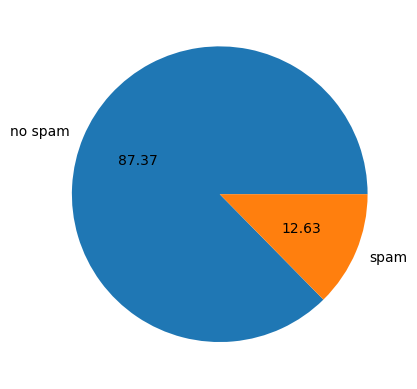

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['no spam','spam'],autopct="%0.2f")
plt.show()

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [25]:
df['nums_chars']=df['text'].apply(len)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_12244\1629254520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nums_chars']=df['text'].apply(len)


In [26]:
df


,target,text,nums_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [27]:
df.sample(5)

,target,text,nums_chars
1816,0,Are you going to write ccna exam this week??,44
5421,0,"Hi elaine, is today's meeting confirmed?",40
600,0,Mind blastin.. No more Tsunamis will occur fro...,104
636,0,"Sweetheart, hope you are not having that kind ...",100
4696,0,"Okey dokey, i‰Û÷ll be over in a bit just sorti...",64


In [28]:
df['words_nums']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Pranav\AppData\Local\Temp\ipykernel_12244\1853151904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words_nums']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [29]:
df

,target,text,nums_chars,words_nums
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [30]:
df['sent_nums']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Pranav\AppData\Local\Temp\ipykernel_12244\1691825363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_nums']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
df

,target,text,nums_chars,words_nums,sent_nums
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [33]:
df = df.drop(columns=['nums'])

KeyError: "['nums'] not found in axis"

In [34]:
df[['words_nums','nums_chars','sent_nums']].describe()

,words_nums,nums_chars,sent_nums
count,5169.000000,5169.000000,5169.000000
mean,18.453279,78.977945,1.947185
std,13.324793,58.236293,1.362406
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,28.000000


In [35]:
df[df['target']==0][['nums_chars','words_nums','sent_nums']].describe()

,nums_chars,words_nums,sent_nums
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
df[df['target']==1][['nums_chars','words_nums','sent_nums']].describe()

,nums_chars,words_nums,sent_nums
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [37]:
import seaborn as sns

<Axes: xlabel='nums_chars', ylabel='Count'>

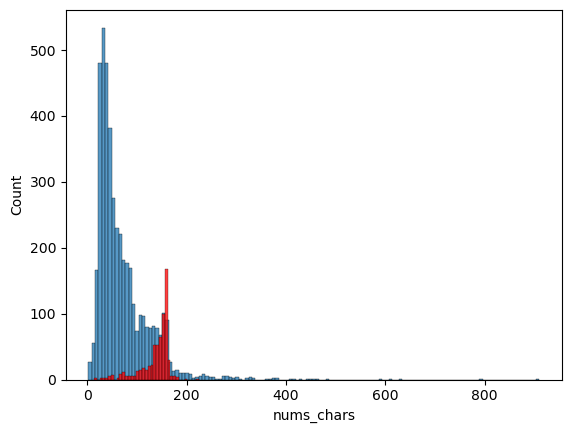

In [38]:
sns.histplot(df[df['target']==0]['nums_chars'])
sns.histplot(df[df['target']==1]['nums_chars'],color='red')

<Axes: xlabel='words_nums', ylabel='Count'>

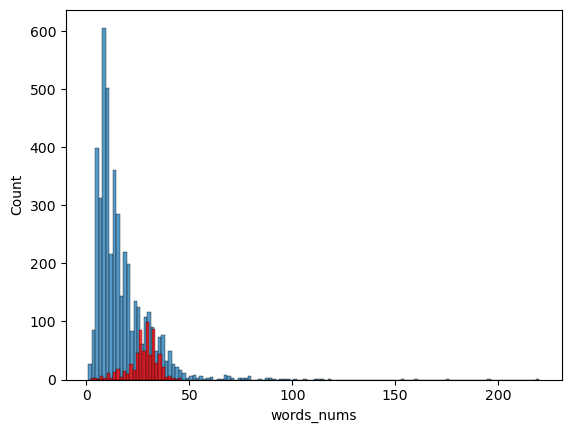

In [39]:
sns.histplot(df[df['target']==0]['words_nums'])
sns.histplot(df[df['target']==1]['words_nums'],color='red')

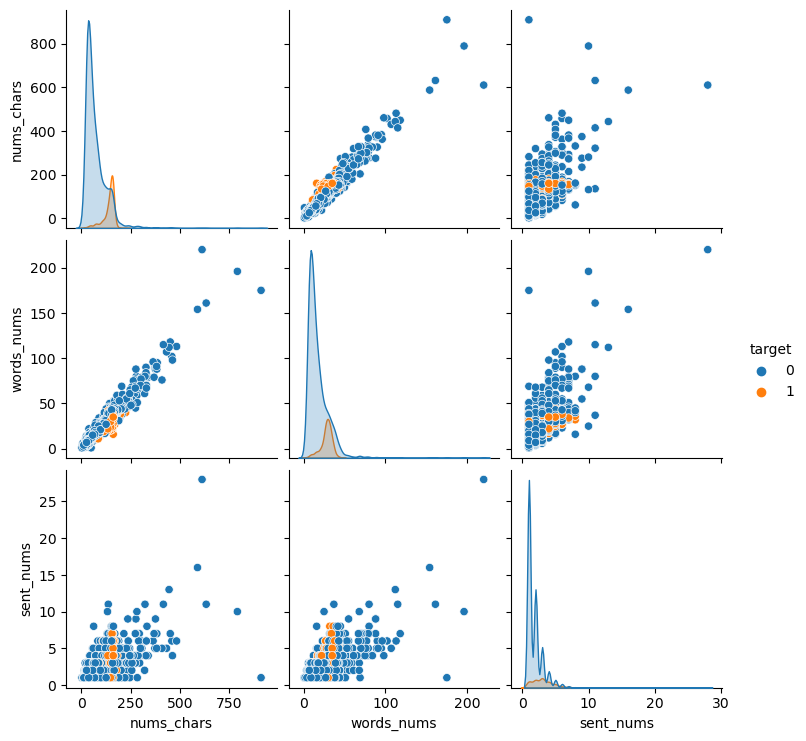

In [40]:
sns.pairplot(df,hue='target')

C:\Users\Pranav\AppData\Local\Temp\ipykernel_12244\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

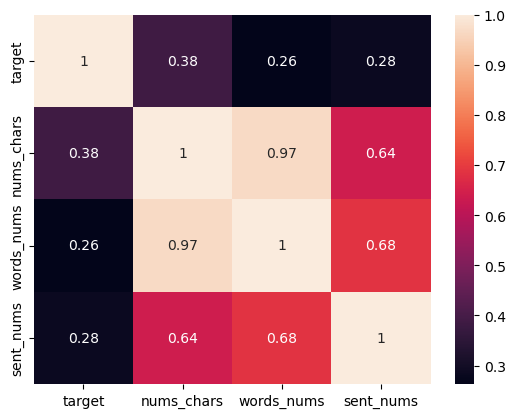

In [41]:
sns.heatmap(df.corr(),annot=True)

In [42]:
df['text'].apply(lambda x:x.lower())

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: text, Length: 5169, dtype: object

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [45]:
def trans_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    text = l[:]
    l.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
    text = l[:]
    l.clear()
    for i in text:
        l.append(ps.stem(i))
    return " ".join(l)

In [46]:
trans_text("33  #$ sdkhfkj my name is Pranav i m a an ok of the ml is also is known as Machine??i m loving ml")

'33 sdkhfkj name pranav ok ml also known machin love ml'

In [47]:
df['text'][20]

'Is that seriously how you spell his name?'

In [48]:
trans_text('Is that seriously how you spell his name?')

'serious spell name'

In [49]:
df['transformed'] = df['text'].apply(trans_text)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_12244\1961257032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed'] = df['text'].apply(trans_text)


In [50]:
df.head()

,target,text,nums_chars,words_nums,sent_nums,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
!pip install wordcloud

In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [56]:
spam_wc = wc.generate(df[df['target']==1]['transformed'].str.cat(sep=" "))


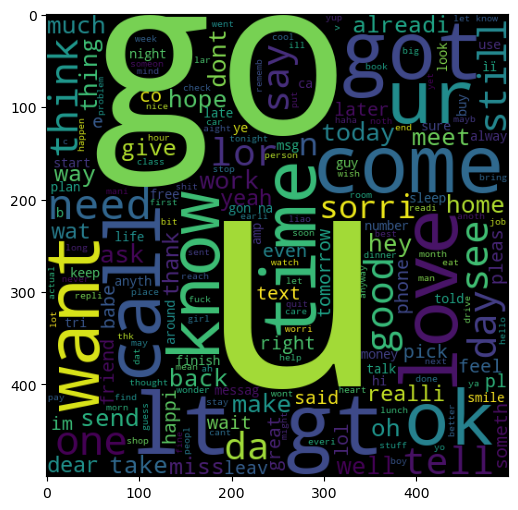

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [58]:
no_spam_wc = wc.generate(df[df['target']==0]['transformed'].str.cat(sep=" "))

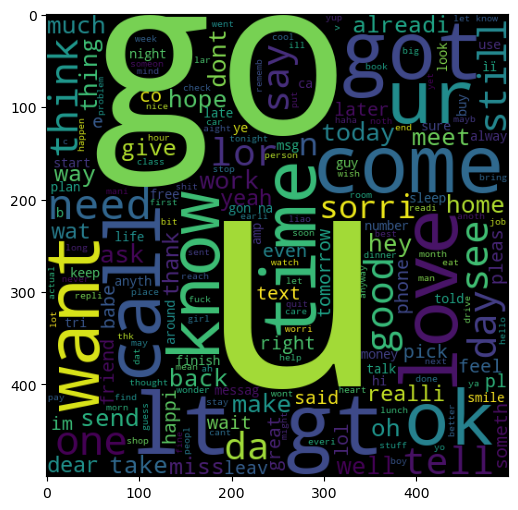

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(no_spam_wc)
plt.show()

In [62]:
df.head()

,target,text,nums_chars,words_nums,sent_nums,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [95]:
spam_corpus = []
for i in df[df['target']==1]['transformed'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [96]:
len(spam_corpus)

9939

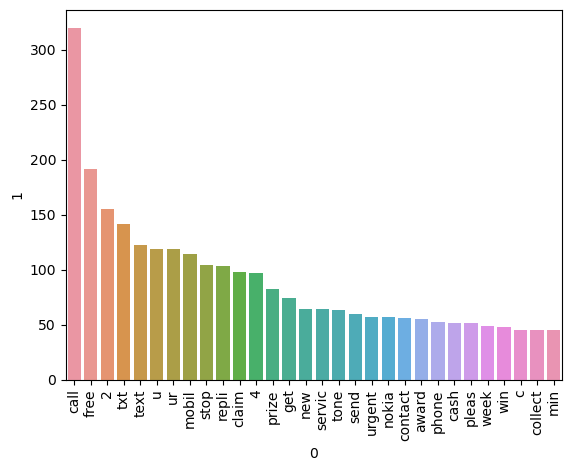

In [97]:
words = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
counts = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
sns.barplot(x=words, y=counts)
plt.xticks(rotation='vertical')
plt.show()

In [98]:
no_spam_corpus = []
for i in df[df['target']==0]['transformed'].tolist():
    for word in i.split():
        no_spam_corpus.append(word)

In [94]:
len(no_spam_corpus)

35394

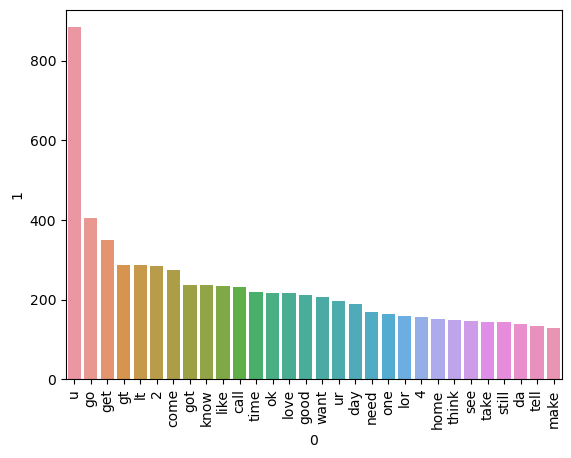

In [99]:
words = pd.DataFrame(Counter(no_spam_corpus).most_common(30))[0]
counts = pd.DataFrame(Counter(no_spam_corpus).most_common(30))[1]
sns.barplot(x=words, y=counts)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [166]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [167]:
x =tfidf.fit_transform(df['transformed']).toarray()

In [168]:
x.shape

(5169, 3000)

In [169]:
y = df['target'].values

In [170]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [173]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [174]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [175]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [176]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [177]:
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [178]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(mnb,open('mnb.pkl','wb'))

In [181]:
import streamlit as st
import pickle
import string
import nltk
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def trans_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    text = l[:]
    l.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
    text = l[:]
    l.clear()
    for i in text:
        l.append(ps.stem(i))
    return " ".join(l)

tfidf = pickle.load(open('tfidf.pkl','rb'))
mnb = pickle.load(open('mnb.pkl','rb'))

st.title('Spam Classifier Filter')

sms_input = st.text_input("Enter the Message")

if st.button("Predict"):
    transformed = trans_text(sms_input)

    vector = tfidf.transform([transformed])

    result = model.predict(vector)[0]

    if result == 1:
        st.header("Spam")

    else:
        st.header("Spam")

2024-02-04 20:04:20.129 
  command:

    streamlit run C:\Users\Pranav\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
